## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил: Кувайцев Константин

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [186]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [187]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return int(np.around(np.sum(weights * marks)))

In [188]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [189]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [190]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [191]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [192]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [193]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    T_F = np.array([abs(array1 - array2) < precision])
    answer = np.array(np.where(T_F == True))
    return answer[1]

In [194]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [195]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [196]:
def block_matrix(block: np.array) -> np.array:
    hor = np.hstack((block, block))
    answer = np.vstack((hor, hor))
    return answer

In [197]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [198]:
def diag_prod(matrix: np.array) -> int:
    ed = np.eye(matrix.shape[0])
    diag = ed * matrix
    elements = diag[diag != 0]
    answer = int(np.prod(elements))
    return answer

In [199]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [200]:
def normalize(matrix: np.array) -> np.array:
    mean_arr = matrix.mean(axis=0)
    std_arr = matrix.std(axis=0)
    std_arr[np.isclose(std_arr, 0)] = 1
    answer = (matrix - mean_arr) / std_arr
    return answer

In [201]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [202]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [203]:
def antiderivative(coefs: np.array) -> np.array:
    powers = np.arange(coefs.shape[0] - 1, -1, -1)
    answer = np.array(coefs / (powers + 1))
    answer = np.append(answer, 0.)
    return answer

In [204]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [205]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [206]:
def make_symmetric(matrix: np.array) -> np.array:
    transpose = matrix.T
    answer = matrix + np.tril(transpose, -1)
    return answer

In [207]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [208]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [209]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    string = np.arange(a, b + 1)
    answer = np.tile(string, m)
    answer.shape = (m, b - a + 1)
    return answer

In [210]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [211]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [212]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    numerator = np.sum(vec1 * vec2)
    denominator = np.sqrt(sum(vec1 ** 2)) * np.sqrt(sum(vec2 ** 2))
    answer = numerator / denominator
    return answer

In [213]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [214]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [216]:
path = "train.csv"
df = pd.read_csv(path)
print('Таблица имеет размер: ', df.shape)

Таблица имеет размер:  (891, 12)


In [217]:
#Первые пять строк
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
#Последние пять строк
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

Survived - бинарный признак; Pclass - категориальный признак; Name - категориальный признак; Sex - категориальный признак; Age - вещественный признак; SibSp - вещественный признак; Parch - вещественный признак; Ticket - категориальный признак; Fare - вещественный признак; Cabin - категориальный признак; Embarked - категориальный признак;

1) (РЕГРЕССИЯ) Определите возраст пассажира по следующим признакам: класс, пол и цена за билет;
2) (КЛАССИФИКАЦИЯ) Определить выжил пассажир или нет по следующим признакам: класс, пол и цена за билет;
3) (КЛАСТЕРИЗАЦИЯ) Сегментация выживших пассажиров

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [219]:
print('Доля выживших после крушения пассажиров: ', df['Survived'].value_counts(1)[1])

Доля выживших после крушения пассажиров:  0.3838383838383838


In [220]:
surv = df[df.Survived == 1]
surv_female = surv.Sex.value_counts(1)[0]
surv_male = surv.Sex.value_counts(1)[1]
print('Доля выживших женжин: ', surv_female)
print('Доля выживших мужчин: ', surv_male)

Доля выживших женжин:  0.6812865497076024
Доля выживших мужчин:  0.31871345029239767


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [221]:
clas = df.Pclass.value_counts()
print('В 3 классе ехало ', clas[3], ' пассажиров')
print('Во 2 классе ехало ', clas[2], ' пассажиров')
print('В 1 классе ехало ', clas[1], ' пассажиров')

В 3 классе ехало  491  пассажиров
Во 2 классе ехало  184  пассажиров
В 1 классе ехало  216  пассажиров


Следовательно, в 3 классе ехало больше всего пассажиров

In [222]:
class3 = df[df.Pclass == 3]
class3_female = class3.Sex.value_counts()[1]
class3_male = class3.Sex.value_counts()[0]
print('В третьем классе ехало ', class3_female, ' женщин')
print('В третьем классе ехало ', class3_male, ' мужчин')

В третьем классе ехало  144  женщин
В третьем классе ехало  347  мужчин


В самом многолюдном классе было больше мужчин

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [223]:
print('Минимальная цена: ', df.Fare.min())
print('Средняя цена: ', df.Fare.mean())
print('Максимальная цена: ', df.Fare.max())

Минимальная цена:  0.0
Средняя цена:  32.2042079685746
Максимальная цена:  512.3292


In [226]:
print('Для Саутгемптона')
print('Минимальная цена: ', df[df.Embarked == 'S'].Fare.min())
print('Средняя цена: ', df[df.Embarked == 'S'].Fare.mean())
print('Максимальная цена: ', df[df.Embarked == 'S'].Fare.max())

Для Саутгемптона
Минимальная цена:  0.0
Средняя цена:  27.07981180124218
Максимальная цена:  263.0


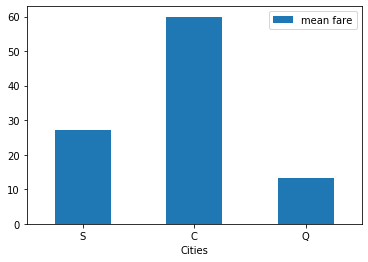

In [227]:
mean_S = df[df.Embarked == 'S'].Fare.mean()
mean_C = df[df.Embarked == 'C'].Fare.mean()
mean_Q = df[df.Embarked == 'Q'].Fare.mean()
mean_df = pd.DataFrame({'Cities':['S', 'C', 'Q'], 'mean fare':[mean_S, mean_C, mean_Q]})
plotbar = mean_df.plot.bar(x= 'Cities', y= 'mean fare', rot=0)

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Избавимся от колонки Ticket потому что очевидно, что выжил пассажир или нет никак не зависит от номера билета; 

In [228]:
df = df.drop(['Ticket'], axis=1)

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

Проверим, есть ли в данных пропуски:

In [229]:
df.isnull().any().any()

True

True - означает, что пропуски есть. Теперь посмотрим, в каких столбцах есть пропуски:

In [230]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Видим, что пропуски есть в столбцах Age, Cabin, Embarked.

In [231]:
print(' В столбце Age ', df.Age.value_counts(dropna= False)[np.nan], ' NaN значений')
print(' В столбце Cabin ', df.Cabin.value_counts(dropna= False)[0], ' NaN значений')
print(' В столбце Embarked ', df.Embarked.value_counts(dropna= False)[3], ' NaN значений')

 В столбце Age  177  NaN значений
 В столбце Cabin  687  NaN значений
 В столбце Embarked  2  NaN значений


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [232]:
#В Age заменим все NaN значения на среднее по полу и классу
Group_s_c = df.groupby(['Sex', 'Pclass'])
Group_s_c.Age.apply(lambda x: x.fillna(x.mean()))
df.Age.fillna(df.Age.mean(), inplace = True)
df.Age.isnull().any()

False

In [233]:
#В Cabin заменим все NaN значения на 'Unknown'
df.Cabin = df.Cabin.fillna('Unknown')
df.Cabin.isnull().any()

False

In [234]:
#В Embarked заменим все NaN значения на S, так как из Саутгемптона было больше всего пассажиров
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
df.Embarked.isnull().any()

False

In [235]:
#Проверим, остались ли еще NaN значения
df.isnull().any().any()

False

In [236]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,Unknown,C


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [237]:
print('Корреляция между возрастом и ценой равна ', df.Age.corr(df.Fare))

Корреляция между возрастом и ценой равна  0.09156609328505758


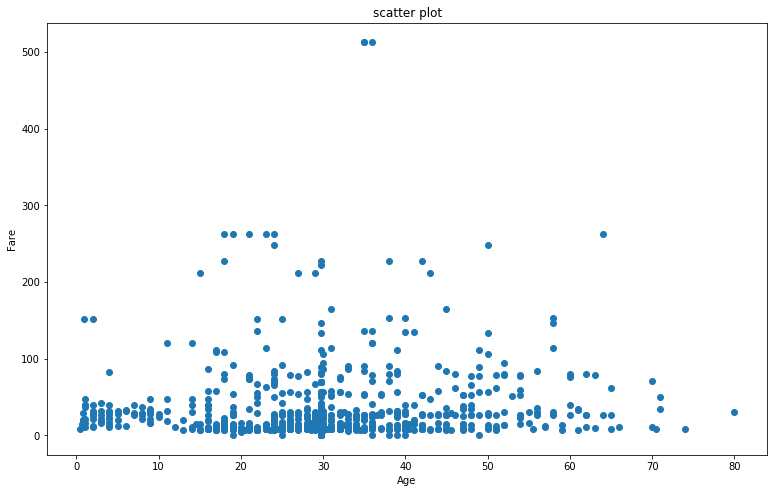

In [238]:
#Построим диаграмму рассеяния
fig=plt.figure(figsize=[10, 6])
ax=fig.add_axes([0,0,1,1])
ax.scatter(df.Age, df.Fare)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('scatter plot')
plt.show()

На основании расчетов и визуализации данных зависимости между возрастом и ценой за билет выявить не удалось

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [239]:
#1 класс
surv_1 = df[df.Pclass == 1].Survived.value_counts(1)[1] * 100
died_1 = 100 - surv_1
print(surv_1)

#2 класс
surv_2 = df[df.Pclass == 2].Survived.value_counts(1)[1] * 100
died_2 = 100 - surv_2

#3 класс
surv_3 = df[df.Pclass == 3].Survived.value_counts(1)[1] * 100
died_3 = 100 - surv_3

#Создадим датафрейм на основе полученных данных для построения графика
pclass_s_d = pd.DataFrame(
    { "Survived":{"Class 1": surv_1,"Class 2": surv_2, "Class 3": surv_3},  
     "Not Survived":{"Class 1": died_1,"Class 2": died_2, "Class 3": died_3}})

62.96296296296296


Text(0.5, 1.0, 'The survival rate in different classes')

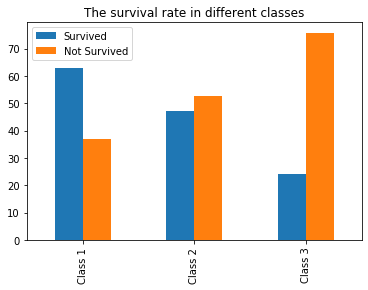

In [240]:
pclass_s_d.plot.bar().set_title("The survival rate in different classes")

Как видно из графика выживаемость пассажиров зависит от класса. Чаще всего выживали пассажиры из 1 класса

Теперь посмотрим на зависимость между ценой за билет и выживаемостью

In [241]:
df.Fare.corr(df.Survived)

0.2573065223849623

Как видно из коффициента корреляции, зависимость между ценой за билет и выживаемостью есть.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [242]:
#Создадим признак Family, который будет показывать, сколько родных плыло вместе с пассажиром на корабле
df['Family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)

In [243]:
#Заменим столбец Sex на бинарное отображение male = 1, female = 0
df.Sex.loc[df.Sex == 'male'] = 1
df.Sex.loc[df.Sex == 'female'] = 0

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Создадим признак, который будет показывать уровень, на котором находился пассажир во время катастрофы.

Данную информацию можно получить из Cabin.

Из открытых источников мы узнаем, что палубы располагались от A до G включительно. Итого 7 палуб.

Поставим каждой палубе в соответствие цифру от 1 до 7, где 1 - палуба A.

In [244]:
df['Level'] = df.Cabin.apply(lambda cabin: ord(list(cabin)[0]) - 64)
df.Level[df.Level == 20] = 21

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


В данных присутствует одна кабина под буквой Т. Для удобства ее я тоже заменил на 21, что соответствует Unknown.

In [245]:
#Число 21 соответствует Unknown в столбце Cabin
print(df.Pclass[df.Level == 21].value_counts())

3    479
2    168
1     41
Name: Pclass, dtype: int64


Посмотрим на распределение пассажиров в каждом классе по палубам

In [246]:
print(df.Level[df.Pclass == 3].value_counts())
print(df.Level[df.Pclass == 2].value_counts())
print(df.Level[df.Pclass == 1].value_counts())

21    479
6       5
7       4
5       3
Name: Level, dtype: int64
21    168
6       8
5       4
4       4
Name: Level, dtype: int64
3     59
2     47
21    41
4     29
5     25
1     15
Name: Level, dtype: int64


In [247]:
df['Class_Level'] = df.Pclass * df.Level

Распределим пассажиров случайным образом по палубам, на которых располагается тот или иной класс

Для второго и третьего класса в данных присутствует очень много пропусков, поэтому для заполнения значений будем использовать вероятности, которые более менее отображают распределение имеющихся данных.

In [248]:
#Для 7 палубы поставим вероятность 0.5, так как эту палубу занимает только 3 класс, а 5 и 6 делят и второй и третий класс
class_3 = [5, 6, 7]
df.Level[df.Class_Level == 63] = np.random.choice(class_3, 479, p=(0.25, 0.25, 0.5))
print(df.Level[df.Pclass == 3].value_counts())

7    238
6    134
5    119
Name: Level, dtype: int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [249]:
#Для 4 палубы поставим вероятность 0.5, руководствуясь той же логикой, что и в предыдущем блоке
class_2 = [4, 5, 6]
df.Level[df.Class_Level == 42] = np.random.choice(class_2, 168, p=(0.5, 0.25, 0.25))
print(df.Level[df.Pclass == 2].value_counts())

4    91
6    50
5    43
Name: Level, dtype: int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


С первым классом ситуация обстоит лучше, и поэтому можно более точно распределить пассажиров с неизвестными кабинами

In [250]:
#Вероятности для каждой палубы будем определять как (количество пассажиров на палубе) / (общее число пассажиров первого класса) 
v_c = df.Level[df.Pclass == 1].value_counts()
sum_v_c = np.sum(v_c) - v_c[21]
p_1 = v_c[1] / sum_v_c
p_2 = v_c[2] / sum_v_c
p_3 = v_c[3] / sum_v_c
p_4 = v_c[4] / sum_v_c
p_5 = v_c[5] / sum_v_c
class_1 = [1, 2, 3, 4, 5]
df.Level[df.Class_Level == 21] = np.random.choice(class_1, 45, p=(p_1, p_2, p_3, p_4, p_5))
print(df.Level[df.Pclass == 1].value_counts())

3    74
2    59
4    34
5    33
1    16
Name: Level, dtype: int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [251]:
#Теперь можем избавиться от ненужных признаков
df = df.drop(['Class_Level', 'Cabin'], axis=1)
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family,Level
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,0.012658,-0.040143,-0.017987
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,0.257307,0.016639,-0.256203
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,-0.549500,0.065997,0.813046
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.182333,-0.200988,0.096256
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,0.091566,-0.248512,-0.278764
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,1.000000,0.217138,-0.468981
Family,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.217138,1.000000,0.080807
Level,-0.017987,-0.256203,0.813046,0.096256,-0.278764,-0.468981,0.080807,1.000000


Как видно, Level коррелирует с Survived наравне с Fare

### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Сколько на корабле было замужних и незамужних женщин? Данную информацию можно "вытащить" из поля Name. Mrs - обращение к замужней женщине, а Miss - к незамужней.

In [252]:
Status = df.Name[df.Sex == 0].apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
Status.mode()

0    Miss
dtype: object

Видим, что незамужних женщин на корабле было больше.

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Значения должны быть отнормированы, потому что при использовании градиентного спуска большие значения могут увеличить время поиска глобального минимума.

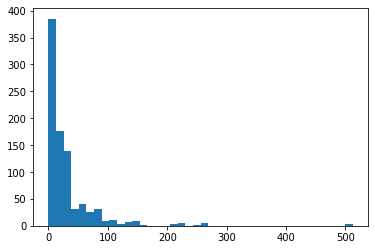

(array([ 24.,  16.,   7.,   7.,  10.,   5.,   8.,  23.,  39.,  40.,  52.,
         46.,  42.,  43., 224.,  37.,  32.,  41.,  18.,  27.,  21.,  14.,
         17.,  18.,  16.,  13.,   9.,   7.,   7.,   6.,   7.,   4.,   4.,
          0.,   2.,   3.,   1.,   0.,   0.,   1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

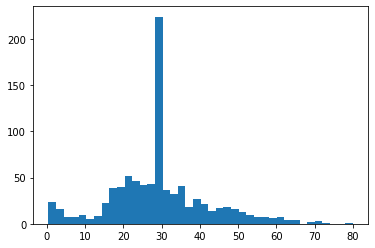

In [253]:
plt.hist(df.Fare, bins=40)
plt.show()
plt.hist(df.Age, bins=40)

In [254]:
#Отнормируем значения
#df.Fare = (df.Fare - df.Fare.mean()) / df.Fare.std()
#df.Age = (df.Age - df.Age.mean()) / df.Age.std()
df.Fare = df.Fare / df.Fare.max()
df.Age = df.Age / df.Age.max()

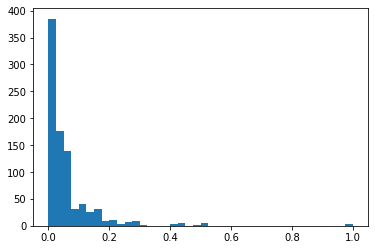

(array([ 24.,  16.,   7.,   7.,  10.,   5.,   8.,  23.,  39.,  40.,  52.,
         46.,  42.,  43., 224.,  37.,  32.,  41.,  18.,  27.,  21.,  14.,
         17.,  18.,  16.,  13.,   9.,   7.,   7.,   6.,   7.,   4.,   4.,
          0.,   2.,   3.,   1.,   0.,   0.,   1.]),
 array([0.00525   , 0.03011875, 0.0549875 , 0.07985625, 0.104725  ,
        0.12959375, 0.1544625 , 0.17933125, 0.2042    , 0.22906875,
        0.2539375 , 0.27880625, 0.303675  , 0.32854375, 0.3534125 ,
        0.37828125, 0.40315   , 0.42801875, 0.4528875 , 0.47775625,
        0.502625  , 0.52749375, 0.5523625 , 0.57723125, 0.6021    ,
        0.62696875, 0.6518375 , 0.67670625, 0.701575  , 0.72644375,
        0.7513125 , 0.77618125, 0.80105   , 0.82591875, 0.8507875 ,
        0.87565625, 0.900525  , 0.92539375, 0.9502625 , 0.97513125,
        1.        ]),
 <a list of 40 Patch objects>)

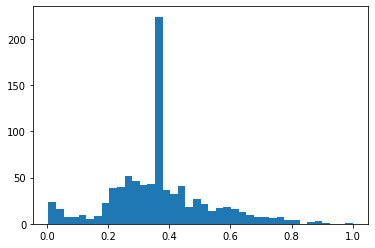

In [255]:
plt.hist(df.Fare, bins=40)
plt.show()
plt.hist(df.Age, bins=40)

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [256]:
#Для начала избавимся от ненужных нам больше признаков
df = df.drop(['PassengerId', 'Name'], axis=1)

Видим, что в столбце Embarked находятся категориальный признак, который принимает строковое значение. С этим можно справиться, если заменить S = 1, C = 2, Q = 3.

In [257]:
df.Embarked[df.Embarked == 'S'] = 1
df.Embarked[df.Embarked == 'C'] = 2
df.Embarked[df.Embarked == 'Q'] = 3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [258]:
df.Pclass = df.Pclass / 3
df.Embarked = df.Embarked / 3
df.Family = df.Family / df.Family.max()
df.Level = df.Level / 7

Теперь значение каждой переменной лежит в пределах от 0 до 1

# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [259]:
from sklearn.base import BaseEstimator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors=3):
        super().__init__()
        self.k = n_neighbors
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = [self.predict_proba(x) for x in X]
        return np.array(y_pred)
    
    def predict_proba(self, x):                    
        distances = [distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_idx]  
        (values, counts) = np.unique(k_labels, return_counts=True)
        ind = np.argmax(counts)  
        return values[ind]

In [260]:
y = np.array(df.Survived)
X = np.array(df.loc[:, 'Pclass':'Level'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [261]:
clf = MyNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.7541899441340782


In [262]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

y_expect = y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       106
           1       0.75      0.60      0.67        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



Реализованный класс и KNeighborsClassifier из библиотеки Sklearn имеют примерно одинаковую точность прогноза.